In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wth = pd.read_csv("weatherAUS_dataset.csv")
wth = wth.dropna()
#test = pd.read_csv("aus_test.csv")
#test = test.dropna()

In [ ]:
X = wth[['Location', 'MinTemp', 'MaxTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am','Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp3pm','RainToday', 'WindDir9am', 'WindGustDir', 'WindDir3pm' ]]
Y = wth['RainTomorrow']

In [ ]:
#X_test = test[['Location', 'MinTemp', 'MaxTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am','Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp3pm','RainToday', 'WindDir9am', 'WindGustDir', 'WindDir3pm'  ]]
#Y_test= test['RainTomorrow']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_Location = LabelEncoder()
le_WindGustDir = LabelEncoder()
le_WindDir9am= LabelEncoder()
le_WindDir3pm = LabelEncoder()

In [ ]:
X['Location_n'] = le_Location.fit_transform(X['Location'])
X['WindGustDir_n'] = le_WindGustDir.fit_transform(X['WindGustDir'])
X['WindDir9am_n'] = le_WindDir9am.fit_transform(X['WindDir9am'])
X['WindDir3pm_n'] = le_WindDir3pm.fit_transform(X['WindDir3pm'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,WindDir9am,WindGustDir,WindDir3pm,Location_n,WindGustDir_n,WindDir9am_n,WindDir3pm_n
6049,Cobar,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,13.0,1006.3,1004.4,2.0,5.0,33.4,0.0,ENE,SSW,SW,5,11,1,12
6050,Cobar,18.4,28.9,0.0,14.8,13.0,37.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,27.0,0.0,SSE,S,SSE,5,8,10,10
6052,Cobar,19.4,37.6,0.0,10.8,10.6,46.0,30.0,42.0,22.0,1012.3,1009.2,1.0,6.0,34.9,0.0,NNE,NNE,NNW,5,5,5,6
6053,Cobar,21.9,38.4,0.0,11.4,12.2,31.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,35.6,0.0,WNW,WNW,WSW,5,14,14,15
6054,Cobar,24.2,41.0,0.0,11.2,8.4,35.0,17.0,19.0,15.0,1010.7,1007.4,1.0,6.0,37.6,0.0,NW,WNW,WNW,5,14,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,35.0,9.0,63.0,32.0,1013.9,1010.5,0.0,1.0,32.3,0.0,SE,ENE,NE,7,1,9,4
142299,Darwin,21.2,32.6,0.0,7.6,8.6,37.0,13.0,56.0,28.0,1014.6,1011.2,7.0,0.0,32.0,0.0,SE,E,SE,7,0,9,9
142300,Darwin,20.7,32.8,0.0,5.6,11.0,33.0,17.0,46.0,23.0,1015.3,1011.8,0.0,0.0,32.1,0.0,E,E,W,7,0,0,13
142301,Darwin,19.5,31.8,0.0,6.2,10.6,26.0,9.0,62.0,58.0,1014.9,1010.7,1.0,1.0,29.2,0.0,SE,ESE,NNW,7,2,9,6


In [ ]:
X_n = X.drop(['Location','WindGustDir','WindDir9am', 'WindDir3pm'],axis='columns')

In [ ]:
X_n

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,Location_n,WindGustDir_n,WindDir9am_n,WindDir3pm_n
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,13.0,1006.3,1004.4,2.0,5.0,33.4,0.0,5,11,1,12
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,27.0,0.0,5,8,10,10
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,42.0,22.0,1012.3,1009.2,1.0,6.0,34.9,0.0,5,5,5,6
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,35.6,0.0,5,14,14,15
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,19.0,15.0,1010.7,1007.4,1.0,6.0,37.6,0.0,5,14,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,63.0,32.0,1013.9,1010.5,0.0,1.0,32.3,0.0,7,1,9,4
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,56.0,28.0,1014.6,1011.2,7.0,0.0,32.0,0.0,7,0,9,9
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,46.0,23.0,1015.3,1011.8,0.0,0.0,32.1,0.0,7,0,0,13
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,62.0,58.0,1014.9,1010.7,1.0,1.0,29.2,0.0,7,2,9,6


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(ccp_alpha = 0.001)

In [ ]:
Clf = model.fit(X_n, Y)

In [ ]:
feature_names = wth.columns

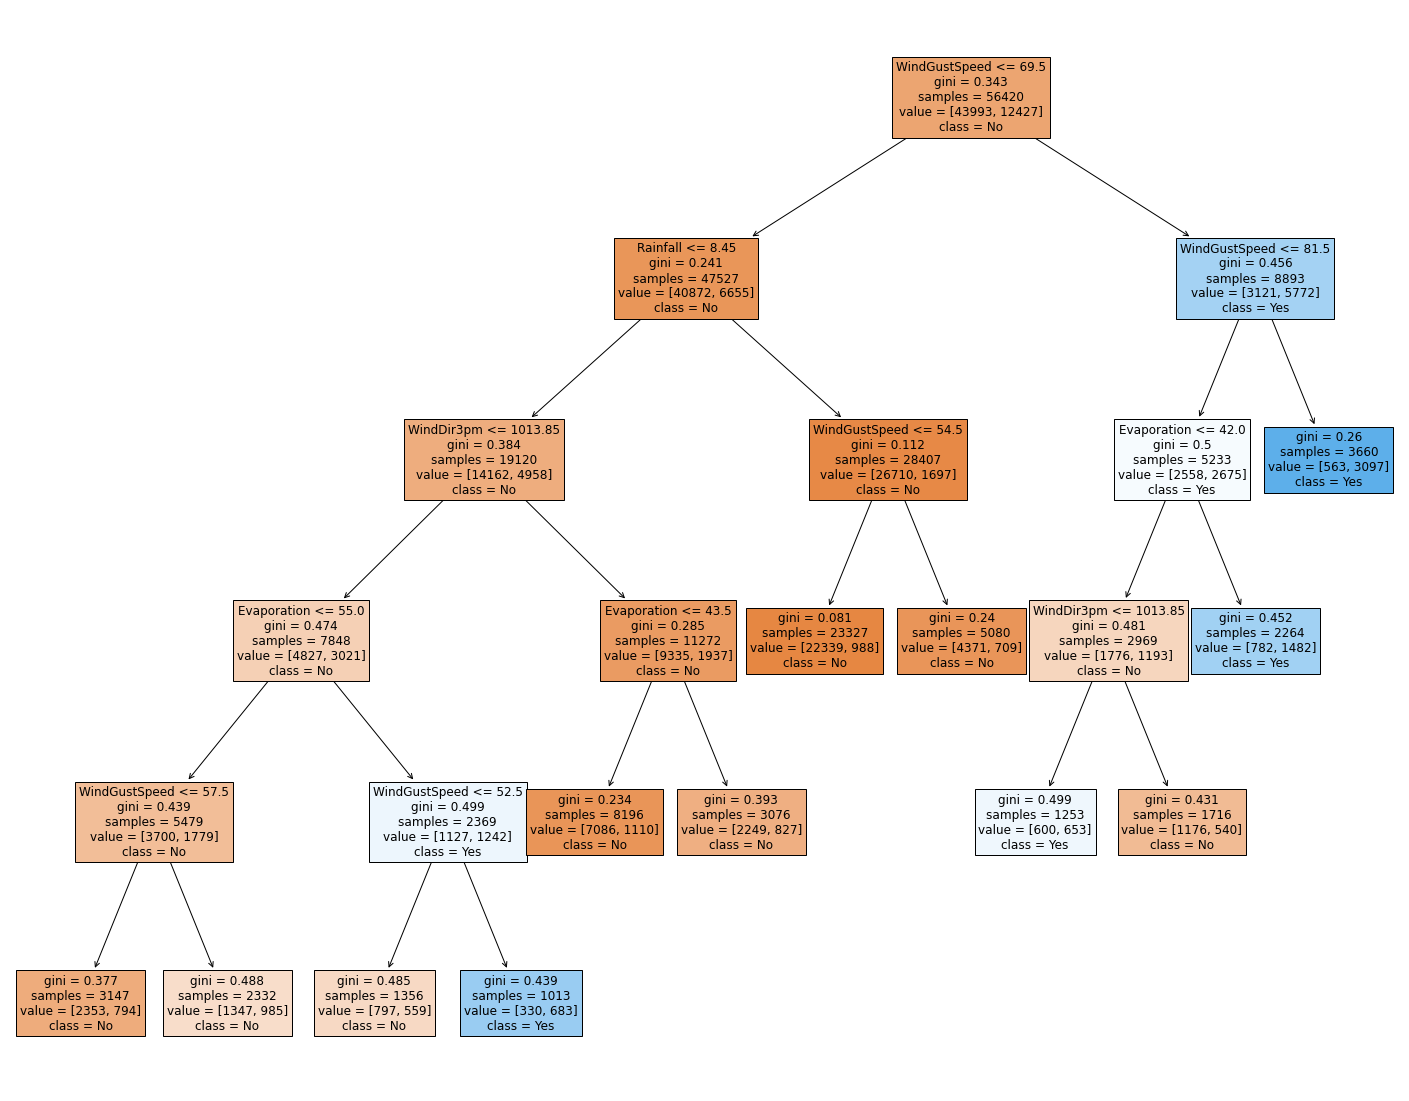

In [ ]:
ig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Clf,
                   feature_names=feature_names,
                   class_names = {0:'No', 1:'Yes'},
                   filled=True,
                   fontsize = 12)